*Import thư viện*

In [47]:
import pandas as pd
import numpy as np

#đọc data
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [48]:
#xóa cột Unnamed: 0 đi vì không dùng đến
diamond_df = diamond_df.drop('Unnamed: 0', axis=1)
diamond_df.head(3)
#

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [49]:
#miêu tả tổng quan về đặc điểm của các thuộc tính ( những thuộc tính có giá trị là số)
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#kiểm tra kiểu dữ liệu của các thuộc tính
diamond_df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

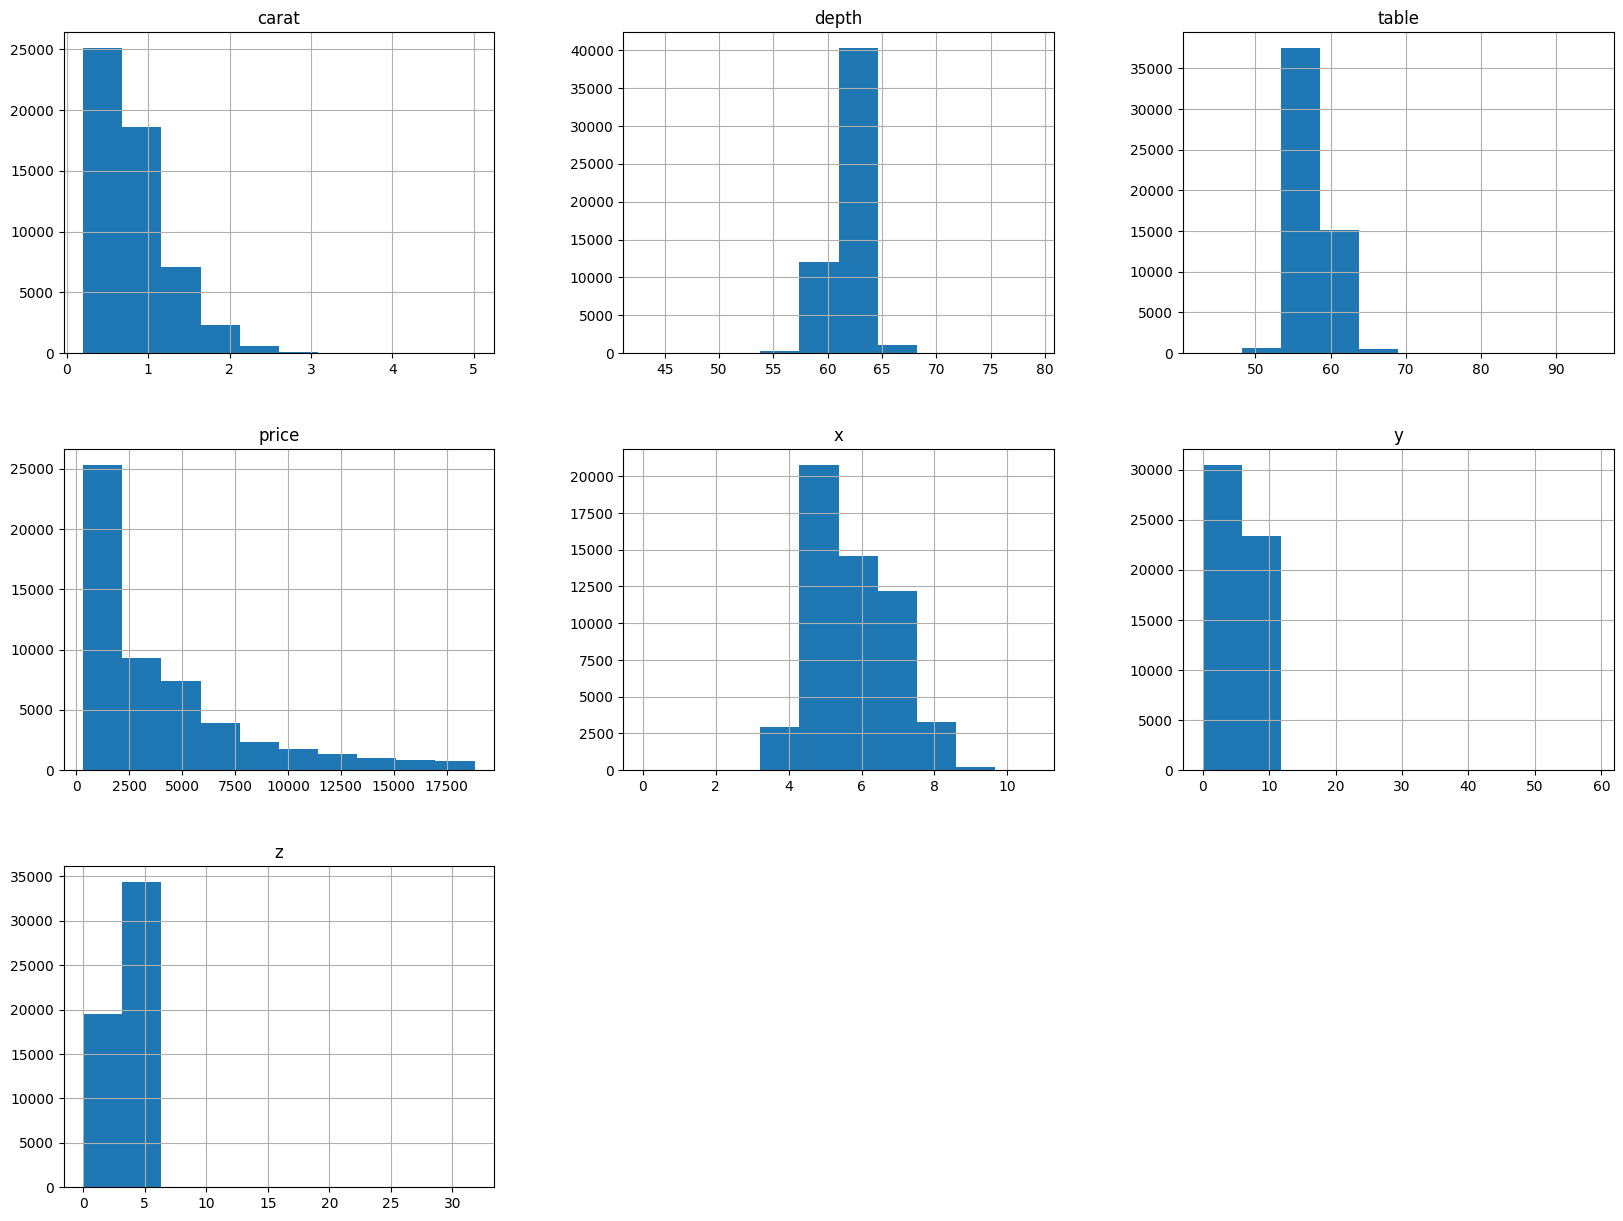

In [ ]:
#xem thống kê về các thuộc tính của dữ liệu
%matplotlib inline
import matplotlib.pyplot as plt
diamond_df.hist(figsize=(20,15))


*Đánh giá quan hệ phụ thuộc (sự tương quan giữa các thuộc tính) để chọn ra thuộc tính cần cho model, và loại bỏ thuộc tính không cần thiết, giảm chi phí cho việc tính toán*

array([[<Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='depth', ylabel='carat'>,
        <Axes: xlabel='table', ylabel='carat'>,
        <Axes: xlabel='price', ylabel='carat'>,
        <Axes: xlabel='x', ylabel='carat'>,
        <Axes: xlabel='y', ylabel='carat'>,
        <Axes: xlabel='z', ylabel='carat'>],
       [<Axes: xlabel='carat', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='table', ylabel='depth'>,
        <Axes: xlabel='price', ylabel='depth'>,
        <Axes: xlabel='x', ylabel='depth'>,
        <Axes: xlabel='y', ylabel='depth'>,
        <Axes: xlabel='z', ylabel='depth'>],
       [<Axes: xlabel='carat', ylabel='table'>,
        <Axes: xlabel='depth', ylabel='table'>,
        <Axes: xlabel='table', ylabel='table'>,
        <Axes: xlabel='price', ylabel='table'>,
        <Axes: xlabel='x', ylabel='table'>,
        <Axes: xlabel='y', ylabel='table'>,
        <Axes: xlabel='z', ylabel='table'>],
       [<Axes: xlabel='ca

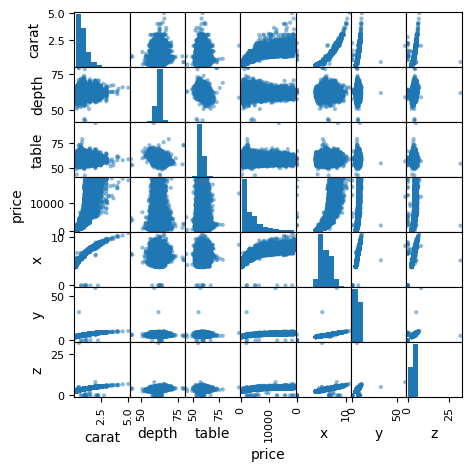

In [ ]:
# dùng hàm scatter của pandas
pd.plotting.scatter_matrix(diamond_df, figsize=(5,5))

Encoding những thuộc tính có kiểu dữ liệu không phải là số, thường có 2 cách:
1. ordinal Encoding
2. one-hot Encoding
-> ở đây sẽ dùng ordinal encoding:
và thứ tự encoding dựa vào quy chuẩn đã được xác định và công nhận rộng rãi trong ngành kim cương.
*ví dụ: màu sắc, thì D:6 là tốt nhất, và J:0 được quy định là kém nhất*

In [50]:
#encoding thuộc tính "cut"
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
diamond_df['cut'] = diamond_df['cut'].map(cut_mapping)
#hoặc dùng cách 2:
# diamond_df = diamond_df.cut.map(cut_mapping)


In [51]:
#encoding thuộc tính "color"
color_mapping = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
diamond_df['color'] = diamond_df['color'].map(color_mapping)
#hoặc dùng cách 2:
# diamond_df = diamond_df.color.map(cut_mapping)


In [52]:
#encoding thuộc tính "clarity"
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1":5, "VVS2": 6, "VVS1": 7, "IF": 8}
diamond_df['clarity'] = diamond_df['clarity'].map(clarity_mapping)
#hoặc dùng cách 2:
#diamond_df = diamond_df.clarity.map(cut_mapping)

In [ ]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*Xử lí các giá trị có thể gây nhiễu*

In [53]:
#loại bỏ những sample có giá trị x,y,z = 0, vì x,y,z là các chiều của viên kim cương
diamond_df = diamond_df.loc[diamond_df['x'] != 0]
diamond_df = diamond_df.loc[diamond_df['y'] != 0]
diamond_df = diamond_df.loc[diamond_df['z'] != 0]

In [54]:
#loại bỏ những sample có giá trị lớn hơn 99% giá trị còn lại
diamond_df = diamond_df.loc[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df.loc[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df.loc[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df.loc[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df.loc[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

In [ ]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000
mean,0.748505,3.965500,3.463974,3.117426,61.717375,57.349591,3561.244631,5.637999,5.641865,3.480219
std,0.406608,1.060319,1.679777,1.640241,1.285391,2.074312,3475.346374,1.035121,1.028587,0.637887
min,0.200000,1.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.390000,3.000000,2.000000,2.000000,61.100000,56.000000,921.000000,4.680000,4.690000,2.890000
50%,0.700000,4.000000,3.000000,3.000000,61.800000,57.000000,2273.000000,5.640000,5.650000,3.480000
75%,1.020000,5.000000,5.000000,4.000000,62.500000,59.000000,4997.000000,6.480000,6.480000,4.010000
max,2.070000,5.000000,6.000000,7.000000,65.500000,63.500000,18806.000000,8.300000,8.150000,5.000000


*Chia bộ dữ liệu: Training - Testing ( 80%-20%)*

In [55]:
#Phân chia data
X = diamond_df.drop('price', axis=1)
Y = diamond_df['price']
print(type(X))
print(Y)

<class 'pandas.core.frame.DataFrame'>
0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 51130, dtype: int64


In [56]:
X_numpy = X.to_numpy()
Y_numpy = Y.to_numpy()
print(type(X_numpy))
print(type(Y_numpy))
print(X_numpy.shape)
print(Y_numpy.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(51130, 9)
(51130,)


In [57]:
#chia bộ data: Train-Test
x_train = X_numpy[:int(0.8*len(X_numpy))]
x_test = X_numpy[int(0.8*len(X_numpy)):]
y_train = Y_numpy[:int(0.8*len(Y_numpy))]
y_test = Y_numpy[int(0.8*len(Y_numpy)):]

In [58]:
#Nomarlize Data
xmean = X_numpy.mean(axis=0)
xstd = X_numpy.std(axis=0)
x_train = (x_train - xmean)/xstd
x_test = (x_test - xmean)/xstd
x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
x_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
print(x_train.shape[1])
print(x_train[0:10])

10
[[ 1.         -1.2752083   0.97565948  0.91443153 -1.29093646 -0.16911383
  -1.13272004 -1.63074171 -1.6156932  -1.64641906]
 [ 1.         -1.32439615  0.03253797  0.91443153 -0.68126398 -1.49168126
   1.75983426 -1.68870649 -1.75180352 -1.83454207]
 [ 1.         -1.12764474  0.03253797 -1.46686056 -0.0715915   0.53106892
   0.31355711 -1.3892218  -1.37263904 -1.33288073]
 [ 1.         -1.07845689 -1.85370505 -2.06218359 -1.29093646  1.23125168
   0.31355711 -1.25397065 -1.25597305 -1.14475772]
 [ 1.         -1.25061437 -0.91058354 -2.06218359  1.14775345  0.84226126
  -0.16853527 -1.64040251 -1.63513753 -1.56803448]
 [ 1.         -1.25061437 -0.91058354 -1.46686056  1.75742593  0.45327084
  -0.16853527 -1.63074171 -1.6156932  -1.5837114 ]
 [ 1.         -1.20142652 -0.91058354 -0.87153754 -0.68126398  0.1420785
  -1.13272004 -1.51481215 -1.48930504 -1.48964989]
 [ 1.         -1.29980222 -2.79682656  0.91443153 -0.0715915   2.6316172
   1.75983426 -1.70802809 -1.81013652 -1.55235756]

*Ôn tập lại linear Regression train với m sample*
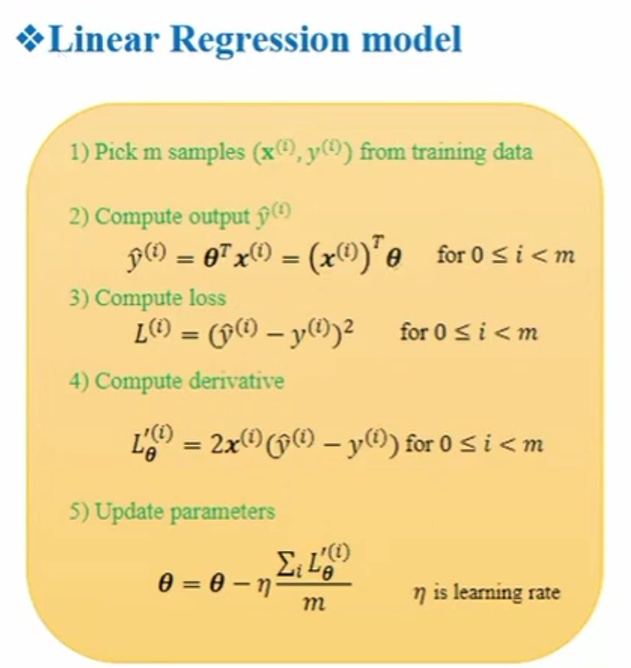

In [61]:
#Linear Regression m sample
N = x_train.shape[0]
n_epoch = 10000
learning_rate = 0.001
m = 1000
#khởi tạo giá trị theta
theta = np.random.rand(x_train.shape[1], 1)
losses = []

for epoch in range(n_epoch):
  for i in range(0, N, m):
    #lấy m sample
    x = x_train[i:i+m, :]
    y = y_train[i:i+m]
    y = y[:, np.newaxis]

    #predict y
    y_hat = x.dot(theta)

    #tính loss
    loss = np.multiply((y_hat - y), (y_hat - y))
    losses.append(np.mean(loss))

    #compute Gradient
    gradient = 2*(y_hat - y)
    gradients = x.T.dot(gradient)

    #update weight
    theta = theta - learning_rate*(gradients/m)

  print(f"Epoch {epoch}/{n_epoch} - Loss: {losses[-1]}")




Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch 5000/10000 - Loss: 639320.7685960024
Epoch 5001/10000 - Loss: 639320.5260279794
Epoch 5002/10000 - Loss: 639320.283571857
Epoch 5003/10000 - Loss: 639320.041227558
Epoch 5004/10000 - Loss: 639319.7989950051
Epoch 5005/10000 - Loss: 639319.5568741235
Epoch 5006/10000 - Loss: 639319.3148648354
Epoch 5007/10000 - Loss: 639319.072967065
Epoch 5008/10000 - Loss: 639318.8311807355
Epoch 5009/10000 - Loss: 639318.5895057725
Epoch 5010/10000 - Loss: 639318.3479420983
Epoch 5011/10000 - Loss: 639318.1064896386
Epoch 5012/10000 - Loss: 639317.865148316
Epoch 5013/10000 - Loss: 639317.6239180554
Epoch 5014/10000 - Loss: 639317.3827987812
Epoch 5015/10000 - Loss: 639317.1417904185
Epoch 5016/10000 - Loss: 639316.9008928909
Epoch 5017/10000 - Loss: 639316.6601061248
Epoch 5018/10000 - Loss: 639316.4194300433
Epoch 5019/10000 - Loss: 639316.1788645728
Epoch 5020/10000 - Loss: 639315.9384096375
Epoch 5021/10000 - Loss: 639315.6980651628
E

In [62]:
#lưu weight
print(xmean)
print(xstd)
print(theta)
np.savez('weight.npz', x_mean=xmean, x_std=xstd, the_ta = theta)

[ 0.74850538  3.96549971  4.46397418  4.11742617 61.71737532 57.34959124
  5.63799922  5.64186544  3.48021866]
[0.40660446 1.06030876 1.67976033 1.64022493 1.2853787  2.07429122
 1.03511133 1.02857736 0.63788053]
[[ 3608.94558991]
 [ 5533.37452089]
 [  104.74660439]
 [  600.35370414]
 [  842.46347328]
 [  -11.81940258]
 [  -78.03023427]
 [-1649.97098882]
 [  653.80461033]
 [ -927.89445263]]


In [63]:
#đánh giá trên tập test bằng MAE
y_pred = x_test.dot(theta)
mae = np.mean(np.abs(y_pred - y_test))
print(f"MAE: {mae}")


MAE: 874.3023670468472


In [4]:
import numpy as np
a = np.array([1,2,3,4,5,6])
b = np.array([1])
c = np.concatenate((a,b), axis=0)
print(c)

[1 2 3 4 5 6 1]


In [65]:
thu = np.array([ 1.,         -1.32439615,  0.03253797,  0.91443153, -0.68126398, -1.49168126,
   1.75983426, -1.68870649, -1.75180352, -1.83454207])
predict = thu.dot(theta)
print(predict)


[-517.43233181]
